# Project: Predicting users’ personality trait based groups and users’ recommendation

Github Link : https://github.com/S-Delowar/Data_Analytics_Project/tree/main/DA%20group%20project

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Descriptive Analysis with IPIP Scores (like sheet)

In [3]:
df = pd.read_csv('IPIP Scores_likes.csv')

In [4]:
df.head()

,Filename,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Unnamed: 71,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,A M Tauhidul Karim Drubo_AIUB_likes.txt,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.0,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,NaN,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,aarif hossain-693654204025796.txt,1461,20.29,0.0,51.33,56.61,31.69,30.18,5.48,3.70,0.55,1.37,0.96,0.48,0.34,1.78,4.79,4.79,3.22,0.34,3.70,0.68,1.37,11.02,2.94,0.48,4.72,2.40,0.0,7.60,0.14,0.07,0.48,3.56,3.15,0.41,0.14,0.07,0.07,9.45,1.16,1.10,0.41,0.68,1.30,0.41,3.49,0.68,0.75,0.34,0.21,0.00,1.10,0.34,0.27,0.14,0.34,7.80,1.30,4.11,2.40,4.24,2.40,3.29,0.41,1.03,0.27,0.00,0.07,0.00,0.14,NaN,0.8,0.800,0.7,0.6,0.4,0.6,0.5,0.7,0.8,0.7
2,Abdul Motalib Shaykat_AIUB_likes.txt,1319,17.59,0.0,47.99,59.44,31.24,31.01,4.32,3.03,0.68,1.29,0.68,0.30,0.08,1.29,5.99,4.32,2.88,0.08,4.17,0.08,1.06,11.60,2.81,0.23,4.85,3.64,0.0,7.58,0.08,0.15,0.61,5.38,5.08,0.15,0.15,0.00,0.00,8.87,0.91,1.06,0.30,0.83,1.06,0.30,3.71,0.76,1.97,0.76,0.68,0.23,1.21,0.53,0.23,0.00,0.45,7.81,1.36,4.17,1.97,4.78,2.35,5.23,0.15,0.99,0.30,0.00,0.08,0.08,0.15,NaN,1.0,0.733,0.6,1.0,0.7,0.9,1.0,1.0,0.9,0.9
3,Abhijit Mondal_AIUB_likes.txt,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.0,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,NaN,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
4,abhishek Saha_AIUB_likes.txt,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.0,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,NaN,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8


In [5]:
df.shape

(251, 82)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Filename        251 non-null    object 
 1   WC              251 non-null    int64  
 2   WPS             251 non-null    float64
 3   Qmarks          251 non-null    float64
 4   Unique          251 non-null    float64
 5   Dic             251 non-null    float64
 6   Sixltr          251 non-null    float64
 7   funct           251 non-null    float64
 8   pronoun         251 non-null    float64
 9   ppron           251 non-null    float64
 10  i               251 non-null    float64
 11  we              251 non-null    float64
 12  you             251 non-null    float64
 13  shehe           251 non-null    float64
 14  they            251 non-null    float64
 15  ipron           251 non-null    float64
 16  article         251 non-null    float64
 17  verb            251 non-null    flo

In [7]:
df.drop('Unnamed: 71', axis=1, inplace=True)

In [8]:
df.shape

(251, 81)

In [9]:
df.isnull().sum()

Filename        0
WC              0
WPS             0
Qmarks          0
Unique          0
               ..
Achievement     0
Power           0
Security        0
Conformity      0
Tradition       0
Length: 81, dtype: int64

In [10]:
df_big5 = pd.read_excel('Data.xlsx')

In [11]:
df_big5.head()

,Filename,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender
0,A M Tauhidul Karim Drubo_AIUB_status.txt,0.625,0.889,0.469,0.750,0.375,m
1,Abhijit Mondal_AIUB_status.txt,0.700,0.722,0.531,0.694,0.469,m
2,abhishek Saha_AIUB_status.txt,0.650,0.389,0.562,0.528,0.500,m
3,Abir Md Moshiur Rahman_AIUB_status.txt,0.750,0.611,0.531,0.833,0.375,m
4,abir Tanzin Adnan_AIUB_status.txt,0.650,0.667,0.500,0.778,0.250,m


In [12]:
df_big5 = df_big5.dropna()

In [13]:
df_big5.isnull().sum()

Filename             0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
Gender               0
dtype: int64

In [14]:
df_big5.shape

(163, 7)

In [15]:
# Statistics Analysis for df_big5 dataframe
summary_df_big5 = df_big5.describe()
summary_df_big5.loc['median'] = df_big5.median()
summary_df_big5.loc['skewness'] = df_big5.skew()
summary_df_big5.loc['kurtosis'] = df_big5.kurt()
summary_df_big5.loc['variance'] = df_big5.var()
summary_df_big5.loc['mad'] = df_big5.mad()
summary_df_big5.round(decimals= 3)

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
count,163.000,163.000,163.000,163.000,163.000
mean,0.633,0.573,0.518,0.647,0.477
std,0.094,0.144,0.098,0.102,0.166
min,0.375,0.194,0.156,0.361,0.125
25%,0.575,0.472,0.469,0.583,0.375
50%,0.650,0.583,0.500,0.639,0.469
75%,0.700,0.667,0.594,0.694,0.562
max,0.875,0.917,0.750,0.944,0.906
median,0.650,0.583,0.500,0.639,0.469
skewness,-0.283,-0.028,-0.206,0.053,0.362


## Outliers

In [16]:
df.shape

(251, 81)

In [17]:
df2 = df.drop('Filename', axis=1)
z_scores = np.abs((df2 - df2.mean()) / df2.std())

# Set the threshold for outliers
threshold = 3

# Find the outliers in each column
outliers = z_scores > threshold

# Print the outliers
outliers.head(10)

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [18]:
total_outliers = outliers.sum()
total_outliers = pd.DataFrame(total_outliers)
print('Total Outliers:')
total_outliers.transpose()

Total Outliers:


,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,8,4,4,3,3,1,2,2,2,2,1,1,3,3,3,1,4,3,2,2,2,2,1,2,5,2,3,8,1,3,3,1,3,3,5,3,5,4,3,2,3,3,3,2,3,2,3,3,3,4,3,4,4,1,3,5,2,2,1,4,3,4,3,3,2,4,4,3,4,3,1,2,1,2,1,1,0,3,0,3


## Outliers for df_big5

In [19]:
new_df = df_big5.drop('Filename', axis=1)
z_scores = np.abs((new_df - new_df.mean()) / new_df.std())

# Set the threshold for outliers
threshold = 3

# Find the outliers in each column
outliers = z_scores > threshold

# outliers
total_outliers = outliers.sum()
total_outliers = pd.DataFrame(total_outliers)
print('Total Outliers of Big5:')
total_outliers.transpose()

Total Outliers of Big5:


,Agreeableness,Conscientiousness,Extraversion,Gender,Neuroticism,Openness
0,0,0,1,0,0,0


## Merging two dataframes

In [20]:
df['First Name'] = df['Filename'].str.split('.').str[0]
df['Name'] = df['First Name'].str.replace('_likes', '')
df.drop('First Name', axis=1, inplace=True)
df.shape

(251, 82)

In [21]:
df_big5.head()

,Filename,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender
0,A M Tauhidul Karim Drubo_AIUB_status.txt,0.625,0.889,0.469,0.750,0.375,m
1,Abhijit Mondal_AIUB_status.txt,0.700,0.722,0.531,0.694,0.469,m
2,abhishek Saha_AIUB_status.txt,0.650,0.389,0.562,0.528,0.500,m
3,Abir Md Moshiur Rahman_AIUB_status.txt,0.750,0.611,0.531,0.833,0.375,m
4,abir Tanzin Adnan_AIUB_status.txt,0.650,0.667,0.500,0.778,0.250,m


In [22]:
df_big5['First Name'] = df_big5['Filename'].str.split('.').str[0]
df_big5['Name'] = df_big5['First Name'].str.replace('_status', '')
df_big5.drop('First Name', axis=1, inplace=True)
df_big5.head()

,Filename,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Name
0,A M Tauhidul Karim Drubo_AIUB_status.txt,0.625,0.889,0.469,0.750,0.375,m,A M Tauhidul Karim Drubo_AIUB
1,Abhijit Mondal_AIUB_status.txt,0.700,0.722,0.531,0.694,0.469,m,Abhijit Mondal_AIUB
2,abhishek Saha_AIUB_status.txt,0.650,0.389,0.562,0.528,0.500,m,abhishek Saha_AIUB
3,Abir Md Moshiur Rahman_AIUB_status.txt,0.750,0.611,0.531,0.833,0.375,m,Abir Md Moshiur Rahman_AIUB
4,abir Tanzin Adnan_AIUB_status.txt,0.650,0.667,0.500,0.778,0.250,m,abir Tanzin Adnan_AIUB


In [23]:
merged_df = pd.merge(df_big5, df, on='Name')

In [24]:
merged_df.drop(['Filename_x', 'Filename_y'], axis=1, inplace=True)


In [25]:
cols = merged_df.columns.tolist()
cols = [cols[6]] + cols[0:6] + cols[7:]
merged_df = merged_df[cols]

In [26]:
merged_df.shape

(157, 87)

In [27]:
merged_df.head()

,Name,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,A M Tauhidul Karim Drubo_AIUB,0.625,0.889,0.469,0.750,0.375,m,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,Abhijit Mondal_AIUB,0.700,0.722,0.531,0.694,0.469,m,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,abhishek Saha_AIUB,0.650,0.389,0.562,0.528,0.500,m,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,Abir Md Moshiur Rahman_AIUB,0.750,0.611,0.531,0.833,0.375,m,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,abir Tanzin Adnan_AIUB,0.650,0.667,0.500,0.778,0.250,m,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


In [28]:
cols_to_keep = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
new_df = merged_df[cols_to_keep].copy()
des = new_df.describe()


# Working with "Openness" 

**Big5 Personality Traits Prediction with Machine Learning Classification**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [30]:
openness_df= merged_df
openness_df.drop(columns=['Conscientiousness','Extraversion', 'Agreeableness', 'Neuroticism','Gender','Name'],inplace = True)

# copy for later uses
openness_df_1 = openness_df.copy()

openness_df.head()

,Openness,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,0.625,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,0.700,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,0.650,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,0.750,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,0.650,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


In [31]:
correlation_matrix = openness_df.corr(method='pearson')['Openness']
print(correlation_matrix)

Openness        1.000000
WC             -0.002036
WPS            -0.037197
Qmarks               NaN
Unique          0.127288
                  ...   
Achievement     0.060931
Power           0.054231
Security       -0.015834
Conformity     -0.115531
Tradition      -0.058344
Name: Openness, Length: 81, dtype: float64


In [32]:
correlation_matrix = openness_df.corr(method='pearson')['Openness']
print(correlation_matrix)
top_10_correlations = correlation_matrix.abs().nlargest(20)

Openness        1.000000
WC             -0.002036
WPS            -0.037197
Qmarks               NaN
Unique          0.127288
                  ...   
Achievement     0.060931
Power           0.054231
Security       -0.015834
Conformity     -0.115531
Tradition      -0.058344
Name: Openness, Length: 81, dtype: float64


In [33]:
print(top_10_correlations)


Openness          1.000000
Self-direction    0.275616
relig             0.233472
swear             0.213962
hear              0.211928
Universal         0.187722
article           0.176721
Sixltr            0.173072
they              0.172168
Stimulation       0.165095
assent            0.165076
home              0.163019
insight           0.153107
adverb            0.148910
verb              0.147648
posemo            0.139711
Unique            0.127288
certain           0.120832
anx               0.120826
ingest            0.120000
Name: Openness, dtype: float64


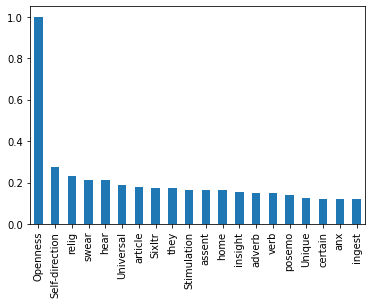

In [34]:
top_10_correlations.plot(kind='bar');

# Classification

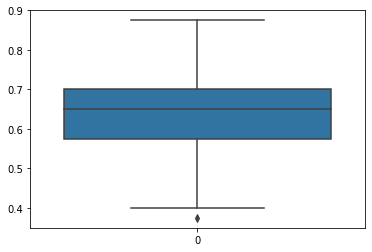

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(data=openness_df['Openness']);

Convert Openness values into three categories according to quadratic values: 

In [36]:
def get_category(val, q1, q3):
    if val > q3:
        return 'high'
    elif val < q1:
        return 'low'
    else:
        return 'medium'

q1 = openness_df['Openness'].quantile(0.25)
q3 = openness_df['Openness'].quantile(0.75)

openness_df['Openness_Category'] = openness_df['Openness'].apply(get_category, args=(q1, q3))
openness_df = openness_df.drop('Openness', axis=1)

In [37]:
openness_df

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness_Category
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,medium
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,medium
2,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8,medium
3,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,high
4,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1004,24.49,0.0,53.78,59.86,27.79,32.37,6.37,4.28,0.20,2.09,1.69,0.30,0.00,2.09,4.48,5.08,3.09,0.30,4.58,0.20,1.69,9.96,3.69,0.40,6.18,2.99,0.00,9.36,0.10,0.10,0.70,5.88,4.98,0.80,0.30,0.30,0.10,10.86,1.39,1.20,0.30,1.59,1.79,0.30,3.59,0.90,0.80,0.40,0.00,0.30,0.70,0.20,0.20,0.30,0.20,8.07,1.79,3.78,2.59,3.19,1.49,3.59,0.30,1.79,0.10,0.00,0.10,0.10,0.40,1.0,0.733,0.8,0.8,0.9,0.9,0.4,0.8,0.7,0.7,medium
153,1337,17.83,0.0,47.12,65.00,28.20,35.60,7.03,4.34,0.30,1.35,2.24,0.45,0.00,2.69,5.98,6.06,4.34,0.22,5.16,0.37,1.87,11.52,3.22,0.37,4.64,2.32,0.00,9.27,0.30,0.15,0.75,4.86,4.56,0.30,0.22,0.00,0.07,11.44,1.05,1.80,0.45,1.05,1.87,0.15,3.81,0.97,2.02,0.90,0.00,0.60,2.39,0.52,0.60,0.15,1.12,8.75,1.50,4.56,2.62,3.52,1.50,2.62,0.67,1.20,0.37,0.07,0.15,0.00,0.22,0.9,0.933,0.8,0.7,0.5,0.7,0.5,1.0,0.4,0.7,high
154,1125,18.15,0.0,53.87,64.53,30.93,34.49,7.73,4.89,0.53,2.49,1.87,0.00,0.00,2.84,4.36,6.40,4.27,0.09,5.78,0.36,1.16,12.44,2.93,0.27,3.11,2.76,0.00,9.24,0.09,0.44,0.62,4.53,4.18,0.36,0.09,0.00,0.09,11.29,1.78,1.60,0.71,1.24,0.98,0.36,4.27,0.80,1.42,0.53,0.00,0.62,1.3

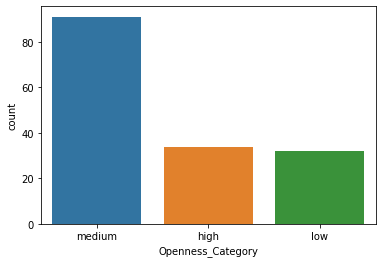

In [38]:
# Checking balancing of data

sns.countplot(data=openness_df, x= 'Openness_Category');

Hence, data are not balanced here, we need to balance the data according to openness_category column. We will use SMOTE method of balancing here.

In [39]:
x = openness_df.drop('Openness_Category', axis=1)
y = openness_df[['Openness_Category']]

##### Synthetic Minority Oversampling Tenique (SMOTe)

In [40]:
# from imblearn.combine import SMOTETomek
# sm = SMOTETomek(random_state= 42, sampling_strategy="auto")
# X_res, y_res = sm.fit_resample(x, y)

In [41]:
y['Openness_Category'].value_counts()

medium    91
high      34
low       32
Name: Openness_Category, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,  k_neighbors=5, sampling_strategy={"high": 100, "medium": 100, "low":100 } )
X_res, y_res = sm.fit_resample(x, y)

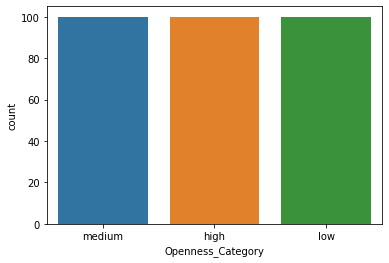

In [43]:
sns.countplot(data=y_res, x= 'Openness_Category');

In [44]:
X_res.shape

(300, 80)

In [45]:
y_res.shape

(300, 1)

In [46]:
y_res['Openness_Category'].value_counts()

medium    100
high      100
low       100
Name: Openness_Category, dtype: int64

In [47]:
# Downloading sampled dataset
df_sampled = X_res
df_sampled['Openness_category'] = y_res['Openness_Category']
df_sampled.to_csv('sampled_df.csv', index=False)

In [48]:
df_sampled.head()

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness_category
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,medium
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,medium
2,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8,medium
3,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,high
4,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,medium


In [49]:
df_sampled.shape

(300, 81)

### Feature Engineering

#### Extra Tree Classifier

In [50]:
X_res = X_res.drop('Openness_category', axis=1)

In [51]:
y_res

,Openness_Category
0,medium
1,medium
2,medium
3,high
4,medium
...,...
295,medium
296,medium
297,medium
298,medium


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_res, y_res)
feature_importance = extra_clf.feature_importances_
feature_importance

array([0.01467109, 0.00982589, 0.        , 0.01686433, 0.01002278,
       0.01298185, 0.01126021, 0.01029783, 0.00852788, 0.01321036,
       0.01299363, 0.0098398 , 0.01337629, 0.01369722, 0.01189305,
       0.01106905, 0.01546821, 0.01175017, 0.02307034, 0.00994652,
       0.01529855, 0.01339439, 0.01088765, 0.01163569, 0.01246208,
       0.01216947, 0.00889169, 0.01432183, 0.00955011, 0.01086691,
       0.01169177, 0.01302721, 0.014221  , 0.01974061, 0.0118971 ,
       0.01686335, 0.01095636, 0.01309749, 0.00890545, 0.01400907,
       0.00845599, 0.01114787, 0.01144972, 0.01271988, 0.00947749,
       0.00991787, 0.01059806, 0.01182725, 0.01249758, 0.02681489,
       0.01099268, 0.010152  , 0.0113367 , 0.01368686, 0.01290449,
       0.01086522, 0.0090953 , 0.01126361, 0.0142858 , 0.01216606,
       0.01657666, 0.00975792, 0.0098201 , 0.01287169, 0.00968742,
       0.01407995, 0.01187362, 0.01697026, 0.0109574 , 0.01108417,
       0.01516142, 0.01545063, 0.02059685, 0.01090857, 0.01100

In [53]:
imp = pd.DataFrame(feature_importance, columns = ['feature_score'])
imp

,feature_score
0,0.014671
1,0.009826
2,0.000000
3,0.016864
4,0.010023
...,...
75,0.011614
76,0.014268
77,0.011158
78,0.017929


In [54]:
X_res.columns
cols = pd.DataFrame(x.columns, columns = ['feature_names'])
gains = pd.concat([cols, imp], axis=1)
gains

,feature_names,feature_score
0,WC,0.014671
1,WPS,0.009826
2,Qmarks,0.000000
3,Unique,0.016864
4,Dic,0.010023
...,...,...
75,Achievement,0.011614
76,Power,0.014268
77,Security,0.011158
78,Conformity,0.017929


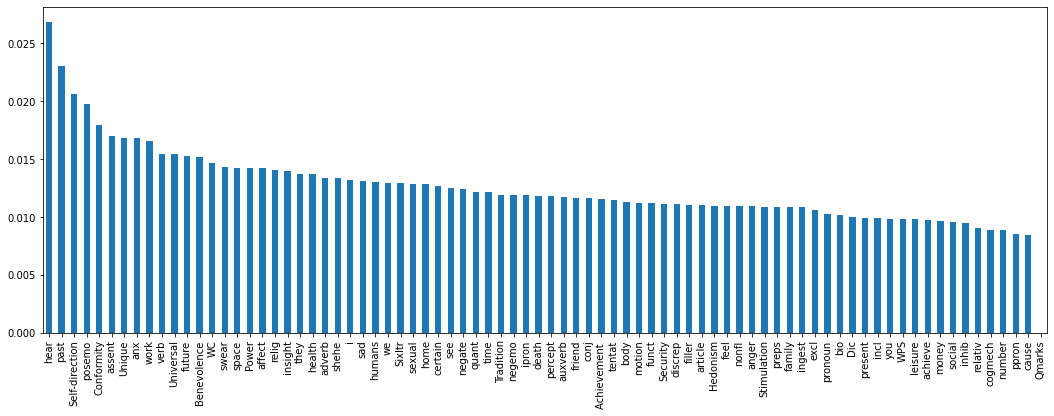

In [55]:
features = pd.Series(feature_importance, index = X_res.columns)
plt.figure(figsize= (18,6));
features.nlargest(features.shape[0]).plot(kind = 'bar');

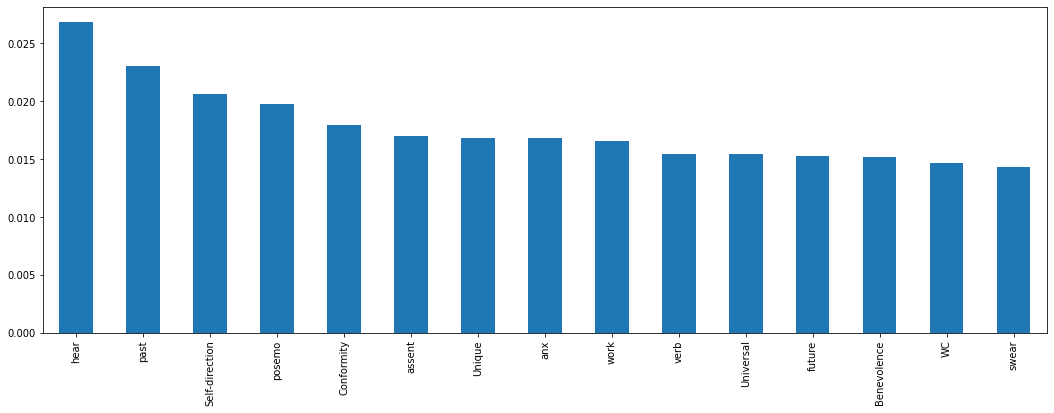

In [56]:
features = pd.Series(feature_importance, index = x.columns)
plt.figure(figsize= (18,6));
features.nlargest(15).plot(kind = 'bar');

In [57]:
most_gains = gains.nlargest(15, 'feature_score')
most_gains

,feature_names,feature_score
49,hear,0.026815
18,past,0.023070
72,Self-direction,0.020597
33,posemo,0.019741
78,Conformity,0.017929
67,assent,0.016970
3,Unique,0.016864
35,anx,0.016863
60,work,0.016577
16,verb,0.015468


In [58]:
X_new = X_res[most_gains.feature_names]
# most_gains.feature_names

featured_columns = X_new.columns

In [59]:
featured_columns

Index(['hear', 'past', 'Self-direction', 'posemo', 'Conformity', 'assent',
       'Unique', 'anx', 'work', 'verb', 'Universal', 'future', 'Benevolence',
       'WC', 'swear'],
      dtype='object')

In [60]:
X_new.head()

,hear,past,Self-direction,posemo,Conformity,assent,Unique,anx,work,verb,Universal,future,Benevolence,WC,swear
0,0.63,0.28,1.0,4.92,0.9,0.00,49.37,0.07,3.93,6.25,1.000,0.21,1.0,1424,0.00
1,0.34,0.75,0.8,4.81,0.6,0.14,48.34,0.07,6.44,6.31,1.000,0.34,0.6,1475,0.00
2,0.34,0.26,0.9,3.01,0.9,0.00,49.18,0.09,4.47,5.07,0.867,0.17,0.9,1163,0.00
3,0.44,0.36,0.4,4.22,0.4,0.00,52.84,0.07,4.66,6.70,0.667,0.44,0.9,1374,0.07
4,0.09,0.09,0.9,4.60,0.8,0.00,53.87,0.09,4.94,5.02,0.733,0.17,0.9,1175,0.00


In [61]:
X_new.shape

(300, 15)

In [62]:
y_new = y_res

# Machine Learning Models for Openness

#### Spliting Traing and Test data

Traing 75% and Testing 25%

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 42)

In [64]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_roc_curve

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [66]:
y_pred = knn.predict(x_test)
knn.score(x_test, y_test)

0.4666666666666667

In [67]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')


              precision    recall  f1-score   support

        high       0.45      0.61      0.52        23
         low       0.56      0.33      0.42        30
      medium       0.42      0.50      0.46        22

    accuracy                           0.47        75
   macro avg       0.48      0.48      0.46        75
weighted avg       0.48      0.47      0.46        75

Label: low
tp=37, fn=20, fp=8, tn=10
Label: medium
tp=38, fn=11, fp=15, tn=11
Label: high
tp=35, fn=9, fp=17, tn=14


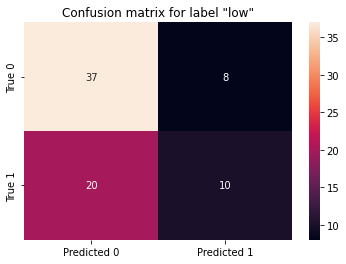

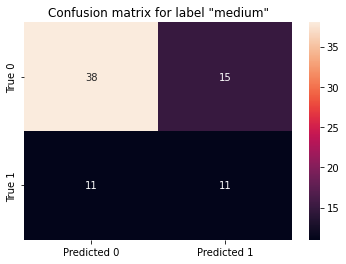

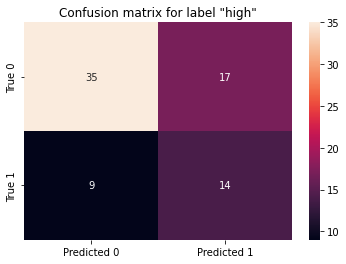

In [68]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()


# Decision Tree

In [69]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [70]:
# features = x.columns
# features
# targets = openness_df.diagnosis

In [71]:
y_pred = dt.predict(x_test)

In [72]:
dt.score(x_test, y_test)

0.72

In [73]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')


              precision    recall  f1-score   support

        high       0.75      0.78      0.77        23
         low       0.77      0.80      0.79        30
      medium       0.60      0.55      0.57        22

    accuracy                           0.72        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.72      0.72      0.72        75

Label: low
tp=38, fn=6, fp=7, tn=24
Label: medium
tp=45, fn=10, fp=8, tn=12
Label: high
tp=46, fn=5, fp=6, tn=18


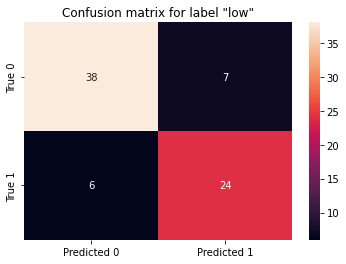

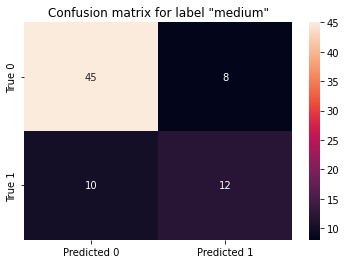

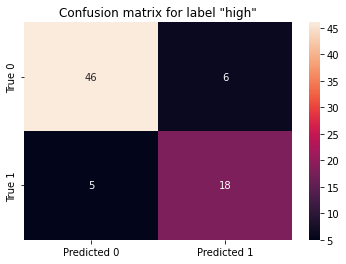

In [74]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.8533333333333334

In [77]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')


              precision    recall  f1-score   support

        high       0.75      0.78      0.77        23
         low       0.77      0.80      0.79        30
      medium       0.60      0.55      0.57        22

    accuracy                           0.72        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.72      0.72      0.72        75

Label: low
tp=38, fn=6, fp=7, tn=24
Label: medium
tp=45, fn=10, fp=8, tn=12
Label: high
tp=46, fn=5, fp=6, tn=18


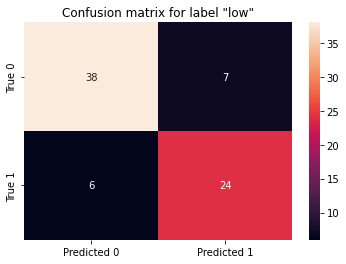

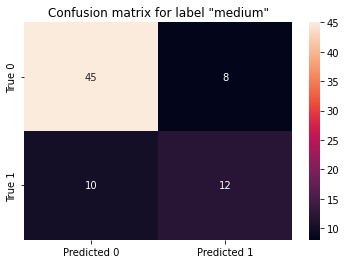

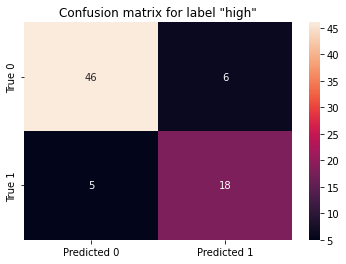

In [78]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()

In [79]:
rf_clf = RandomForestClassifier(n_estimators= 100, max_leaf_nodes=16, n_jobs=-1, criterion='entropy', random_state=0)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.7866666666666666

# Adaboost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
ada_clf = AdaBoostClassifier(n_estimators= 100, learning_rate= 0.5)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.6533333333333333

In [82]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

              precision    recall  f1-score   support

        high       0.75      0.78      0.77        23
         low       0.77      0.80      0.79        30
      medium       0.60      0.55      0.57        22

    accuracy                           0.72        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.72      0.72      0.72        75

Label: low
tp=38, fn=6, fp=7, tn=24
Label: medium
tp=45, fn=10, fp=8, tn=12
Label: high
tp=46, fn=5, fp=6, tn=18


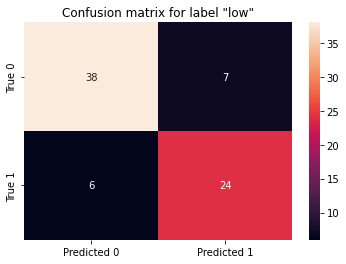

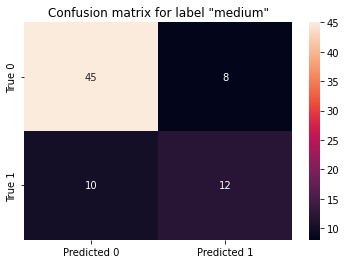

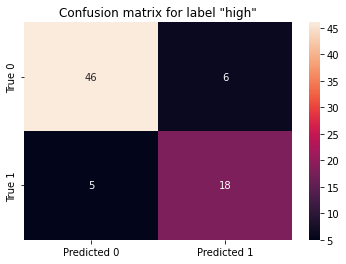

In [83]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()

# Regression

### Linear Regression

Working with openness_df_1

In [84]:
openness_df_1.head()

,Openness,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,0.625,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,0.700,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,0.650,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,0.750,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,0.650,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


In [85]:
openness_df_1.isnull().sum()

Openness        0
WC              0
WPS             0
Qmarks          0
Unique          0
               ..
Achievement     0
Power           0
Security        0
Conformity      0
Tradition       0
Length: 81, dtype: int64

In [86]:
correlation_matrix = openness_df_1.corr(method='pearson')['Openness']
print(correlation_matrix)


Openness        1.000000
WC             -0.002036
WPS            -0.037197
Qmarks               NaN
Unique          0.127288
                  ...   
Achievement     0.060931
Power           0.054231
Security       -0.015834
Conformity     -0.115531
Tradition      -0.058344
Name: Openness, Length: 81, dtype: float64


In [87]:
top_10_correlations = correlation_matrix.abs().nlargest(20)

In [88]:
print(top_10_correlations)


Openness          1.000000
Self-direction    0.275616
relig             0.233472
swear             0.213962
hear              0.211928
Universal         0.187722
article           0.176721
Sixltr            0.173072
they              0.172168
Stimulation       0.165095
assent            0.165076
home              0.163019
insight           0.153107
adverb            0.148910
verb              0.147648
posemo            0.139711
Unique            0.127288
certain           0.120832
anx               0.120826
ingest            0.120000
Name: Openness, dtype: float64


In [89]:
top_10_df = pd.DataFrame(top_10_correlations)

In [90]:
top_10_df

,Openness
Openness,1.000000
Self-direction,0.275616
relig,0.233472
swear,0.213962
hear,0.211928
Universal,0.187722
article,0.176721
Sixltr,0.173072
they,0.172168
Stimulation,0.165095


In [91]:
x = openness_df_1[['Self-direction', 'relig', 'swear', 'hear', 'Universal', 'article', 'Sixltr', 'they', 'Stimulation', 'assent', 'home', 'insight', 'adverb', 'verb',  'posemo' ]]
y = openness_df_1[['Openness']]

In [92]:
x.head()

,Self-direction,relig,swear,hear,Universal,article,Sixltr,they,Stimulation,assent,home,insight,adverb,verb,posemo
0,1.0,0.56,0.00,0.63,1.000,6.18,31.18,0.07,0.9,0.00,0.42,1.05,1.54,6.25,4.92
1,0.8,0.20,0.00,0.34,1.000,6.10,30.64,0.20,0.7,0.14,0.34,1.49,2.24,6.31,4.81
2,0.9,0.43,0.00,0.34,0.867,5.50,30.87,0.34,0.9,0.00,0.34,0.95,1.55,5.07,3.01
3,0.4,0.66,0.07,0.44,0.667,4.80,30.42,0.15,0.3,0.00,0.44,1.31,1.60,6.70,4.22
4,0.9,0.43,0.00,0.09,0.733,5.79,31.06,0.00,0.8,0.00,0.60,1.96,1.02,5.02,4.60


In [93]:
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (157, 15)
y shape: (157, 1)


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_roc_curve

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(x_test)

In [98]:
#Check Accuracy Score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume y_tr is your ground truth target variable, and y_pred is your predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)


MSE:  0.005900570858051228
RMSE:  0.07681517335820592
MAE:  0.05791788021022447
R-squared:  0.2771122991667715


### Logistic Regression

In [99]:
data = df_sampled
data.head()

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness_category
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,medium
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,medium
2,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8,medium
3,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,high
4,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,medium


In [100]:
data.shape


(300, 81)

In [101]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [102]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on the training data
softmax_reg.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = softmax_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



Accuracy: 0.6666666666666666


# Clustering

### K-Means Clustering

In [122]:
best_2_features = ['hear', 'past']

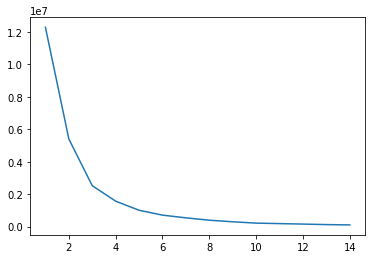

In [125]:
import sklearn.cluster as cluster

# Calculating WCSS (Within-Cluster Sum of Squares):
# [ WCSS measures the sum of the squared distances between each point and its assigned cluster center (centroid), averaged over all clusters]

wcss =[]
clusters = range(1,15)
for k in clusters:
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(cluster_df[featured_columns])
  wcss.append(kmeans.inertia_) 

plt.plot(clusters, wcss);

4


<Figure size 432x432 with 0 Axes>

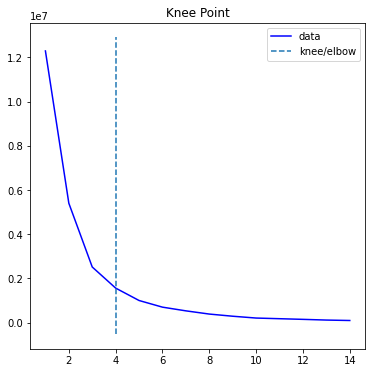

In [145]:
plt.figure(figsize= (6,6));

from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

total_clusters = kn.knee
print(total_clusters)

kn.plot_knee()

In [129]:
kmeans = cluster.KMeans(n_clusters= total_clusters)

In [130]:
predicted = kmeans.fit_predict(cluster_df[best_2_features])
cluster_df['new_cluster'] = predicted

In [131]:
cluster_df['new_cluster'].value_counts()

2    119
0     77
3     76
1     28
Name: new_cluster, dtype: int64

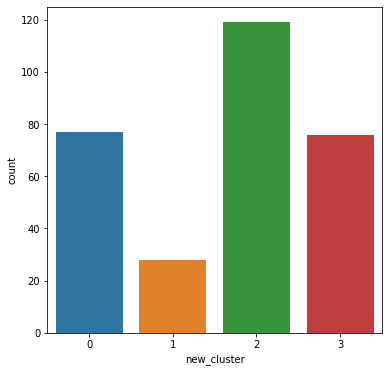

In [146]:
plt.figure(figsize= (6,6));

sns.countplot(data = cluster_df, x = 'new_cluster');

In [133]:
centers = kmeans.cluster_centers_

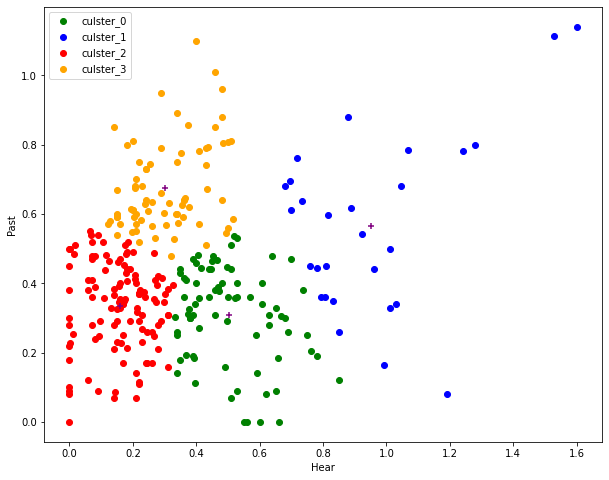

In [134]:
df0 = cluster_df[cluster_df.new_cluster == 0]
df1 = cluster_df[cluster_df.new_cluster == 1]
df2 = cluster_df[cluster_df.new_cluster == 2]
df3 = cluster_df[cluster_df.new_cluster == 3]

plt.figure(figsize=(10,8));
plt.scatter(df0['hear'], df0['past'], color='green', label='culster_0');
plt.scatter(df1['hear'], df1['past'], color='blue', label='culster_1');
plt.scatter(df2['hear'], df2['past'], color='red', label='culster_2');
plt.scatter(df3['hear'], df3['past'], color='orange', label='culster_3');

plt.scatter(centers[:,0], centers[:,1], color='purple', marker='+');

plt.xlabel('Hear')
plt.ylabel('Past')
plt.legend()
plt.show()

# RNN

In [116]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [117]:
top_3_features = featured_columns[0:3]
print(top_3_features)

Index(['hear', 'past', 'Self-direction'], dtype='object')


In [118]:
X = X_res[top_3_features]
y = y_res

In [119]:
print(X.shape)
print(y.shape)

(300, 3)
(300, 1)


In [120]:
# Scale the input data using MinMaxScaler to ensure all values are between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Reshape the input data to fit the RNN architecture
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [171]:
# Set up the RNN architecture using Keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, activation='tanh', input_shape=(1, X.shape[1])))
model.add(tf.keras.layers.Dense(units=5, activation='linear'))
# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)